# 판매 분석

In [10]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [2]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [4]:
import db_module as dm

In [5]:
!ls -la

total 32
drwxr-xr-x 1 root root 4096 Aug 26 05:07 .
drwxr-xr-x 1 root root 4096 Aug 26 03:33 ..
drwxr-xr-x 4 root root 4096 Aug 13 13:34 .config
-rw-r--r-- 1 root root  453 Aug 26 05:06 db_module.py
drwxr-xr-x 2 root root 4096 Aug 26 04:05 .ipynb_checkpoints
-rw-r--r-- 1 root root  135 Aug 26 05:07 mysql.json
drwxr-xr-x 2 root root 4096 Aug 26 05:07 __pycache__
drwxr-xr-x 1 root root 4096 Aug 13 13:35 sample_data


In [6]:
import pymysql

def get_monthly(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
        SELECT DATE_FORMAT(sdate, '%m') AS `month`, 
            SUM(revenue) AS revenue, SUM(profit) AS profit
            FROM sales_book
            GROUP BY `month`
            ORDER BY `month`;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

## 1. 월별 매출/이익

In [8]:
results = dm.get_monthly_data(config)
#results = get_monthly(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,5879400,621820
02,6017700,474600
03,7464600,662650
04,4621400,460590
05,5944700,499300
06,3000400,176800
07,6953200,522940
08,6082700,426000
09,5695600,625140


In [9]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]

In [10]:
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,5879400,6017700,7464600,4621400,5944700,3000400,6953200,6082700,5695600,6132000,5751100,5189700,68732500
이익,621820,474600,662650,460590,499300,176800,522940,426000,625140,589980,466820,279790,5806430


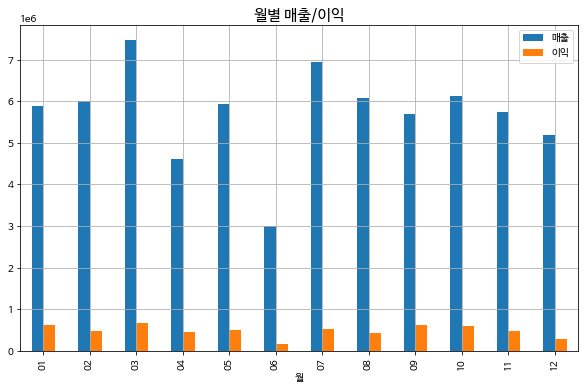

In [11]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

## 2. 거래처별 매출/이익